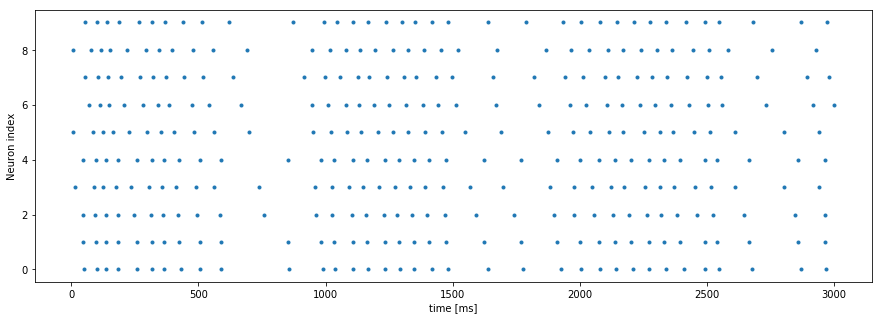

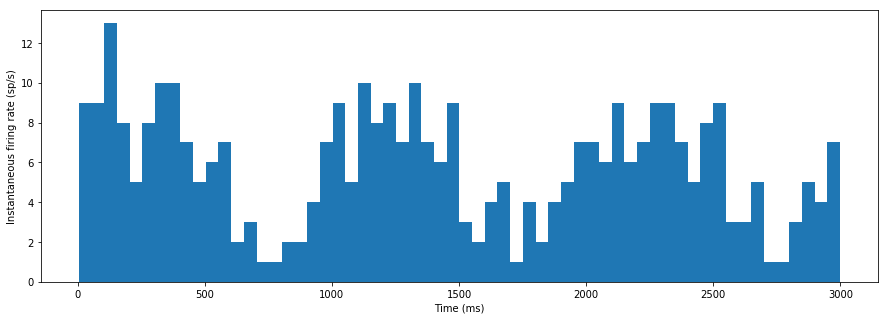

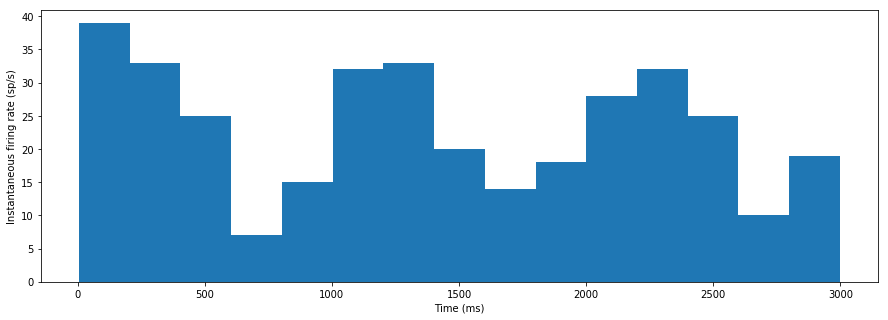

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import brian2 as b2
import math
from brian2 import *
from neurodynex.tools import input_factory, plot_tools

start_scope() 
# Descrição dos parâmetros
tau = 3000*ms
simulation_time = 3000*ms
num_inputs = 20
rates = '(12*Hz+6*sin(2*pi*t*1*Hz)*1*Hz)'
weight = 0.05
N = 10

# Use this list to store output rates
output_rates = []

# Constructing the network 
P = PoissonGroup(num_inputs, rates=rates, dt = 0.001*ms)

# Descrição do modelo neurônio 
eqs = '''
dv/dt = -v/tau : 1
'''
G = NeuronGroup(N, eqs, threshold='v>1', reset='v=0', method='exact')

statemon = StateMonitor(G, ["v"], record=True) # monitor de potencial
spikemon = SpikeMonitor(G, variables='v') # monitor de spikes
G.v = 'rand()'

S = Synapses(P, G, on_pre='v += weight')
S.connect()

statemon = StateMonitor(G, 'v', record=True) # monitor de potencial
spikemon = SpikeMonitor(G, 'v') # monitor de spikes
# Run it and store the output firing rate in the list
run(simulation_time)

# print("Number of spikes: %s" % spikemon.count[:])
# print("Spike times: %s" % spikemon.t[:])

fig = figure(figsize=(15, 5))
plt.plot(spikemon.t/b2.ms, spikemon.i, '.')
plt.xlabel('time [ms]')
plt.ylabel('Neuron index')

fig = figure(figsize=(15, 5))
_ = hist(spikemon.t/ms, 3000/50)
plt.xlabel('Time (ms)')
plt.ylabel('Instantaneous firing rate (sp/s)');

fig = figure(figsize=(15, 5))
_ = hist(spikemon.t/ms, 3000/200)
plt.xlabel('Time (ms)')
plt.ylabel('Instantaneous firing rate (sp/s)');

plt.show()


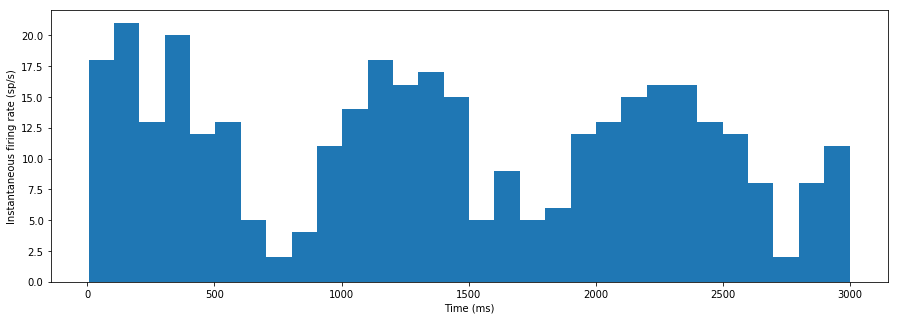

In [68]:
fig = figure(figsize=(15, 5))
_ = hist(spikemon.t/ms, 3000/100)
plt.xlabel('Time (ms)')
plt.ylabel('Instantaneous firing rate (sp/s)');

plt.show()
